# Optimizations (Draft)

## OR-tools

https://developers.google.com/optimization/introduction/python

In [1]:
#!pip install ortools

Maximize $3x+y$

Subjected to:

$0 \le x \le 1$

$0 \le y \le 2$

$x+y \le 2$

In [2]:
# Step 1: Import the required libraries.
from __future__ import print_function
from ortools.linear_solver import pywraplp

# Step 2: Declare the solver.
# Create the linear solver with the GLOP backend.
solver = pywraplp.Solver.CreateSolver('GLOP')

# Step 3: Create the variables.
x = solver.NumVar(0, 1, 'x')
y = solver.NumVar(0, 2, 'y')

print('Number f variables = ', solver.NumVariables())

# Define the constraints.
# The first two constraints are already set. The following code defines the remaining constraint
# Create a linear constraint, 0 <= x + y <= 2.
ct = solver.Constraint(0, 2, 'ct')
ct.SetCoefficient(x, 1)
ct.SetCoefficient(y, 1)

print('Number of constraints =', solver.NumConstraints())

# Step 4: Define the objective function.
objective = solver.Objective()
objective.SetCoefficient(x, 3)
objective.SetCoefficient(y, 1)
objective.SetMaximization()

# Step 5: Invoke the solver and display the results.
solver.Solve()
print('Objective value =', objective.Value())
print('x =', x.solution_value())
print('y =', y.solution_value())




Number f variables =  2
Number of constraints = 1
Objective value = 4.0
x = 1.0
y = 1.0


## My Simplex Method implementation

In [4]:
import numpy as np

class SimplexSolver():
    """A solver of standard form with simplex method."""
    def __init__(self):
        self.m = int(input("Number of constraints: "))
        self.n = self.m + int(input("Number of variables: "))
        self.B = [i for i in range(self.n - self.m, self.n)]
        self.N = [i for i in range(self.n - self.m)]
        self.c = np.array([[float(i)] for i in input("Coefficient of objective: ").split()] + [[0]]*self.m)
        print("Coefficient of constraint:")
        container = []
        for _ in range(self.m):
            container.append([float(i) for i in input().split()])
        
        self.A = np.hstack((np.array([row[:-1] for row in container]), np.identity(self.m)))
        self.b = np.array([[row[-1]] for row in container])
        
        self.p, self.Q, self.z, self.r = [], [], [], []
        self._update_tablaeu()
        self._solve()

    def objective_value(self):
        return self.z[0, 0]
    
    def optimal_solution(self):
        if self.z != float('inf'):
            result = [0]*(self.n - self.m)
            for j in range(self.m):
                if self.B[j] in range(self.n - self.m):
                    result[self.B[j]] = self.p[j, 0]
            return result
        else: return None

    def _update_tablaeu(self):
        self.p = np.linalg.inv(self._part(self.A, self.B)) @ self.b
        self.Q = - np.linalg.inv(self._part(self.A, self.B)) @ self._part(self.A, self.N)
        self.z = (self._part(self.c, self.B, False)).T @ np.linalg.inv(self._part(self.A, self.B)) @ self.b
        self.r = self._part(self.c, self.N, False) - ((self._part(self.c, self.B, False)).T @ np.linalg.inv(self._part(self.A, self.B)) @ self._part(self.A, self.N)).T
    
    def _part(self, A, B, column=True):
            return np.hstack([A[:, i:i+1] for i in B]) if column else np.vstack([A[i:i+1, :] for i in B])

    def _entering_position(self):
        """Return the INDEX in N of the basic-entering variable, which has positive coefficient."""
        for j in range(self.n - self.m):
            if self.r[j, 0] > 0:
                return j
        return None

    def _leaving_position(self, beta):
        """Return the INDEX in B of the basic-leaving variable, or None if there is no row with a negative coefficient of entering variable (unbounded)"""
        lower_bound = sorted([(- self.p[i, 0]/self.Q[i, beta], i) for i in range(self.m) if self.Q[i, beta] < 0])
        return lower_bound[0][1]

    def _solve(self): # must handle the no BFS case
        beta = self._entering_position() 
        while beta != None:
            alpha = self._leaving_position(beta)
            self._status()                      # REMOVE this line in execution
            if alpha == None: 
                self.z = float('nf')
                return
            else:
                self.B[alpha], self.N[beta] = self.N[beta], self.B[alpha]
                self._update_tablaeu()
                beta = self._entering_position()


    def _status(self):
        print(self.B, self.N)
        print(self.p)
        print(self.Q)
        print(self.z)
        print(self.r)

#solver = SimplexSolver()
#print(solver.objective_value())
#print(solver.optimal_solution())


## Mixed integer programming

Maximize $x + 10y$ 

subject to:

$x + 7y \le 17.5$

$x \le 3.5$

$x \ge 0$

$y \ge 0$

$x, y$ are integers

In [ ]:
# Import the linear solver wrapper
from ortools.linear_solver import pywraplp

# Declare the MIP solver
solver = pywraplp.Solver.CreateSolver('SCIP')

INF = solver.infinity()

x = solver.IntVar(0.0, INF, 'x')
y = solver.IntVar(0.0, INF, 'y')

# Define the constraints
solver.Add(x + 7*y <= 17.5)
solver.Add(x <= 3.5)

# Define the objective
solver.Maximize(x + 10*y)

# Call the MIP solver
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

BCA problem

In [ ]:
# BCA problem


from ortools.linear_solver import pywraplp
import numpy as np

solver = pywraplp.Solver.CreateSolver('SCIP')
INF = solver.infinity()

T, N = 3, 13
credits = np.array([3,3,4,3,4,3,3,3,4,3,3,4,4])
preference = np.array([[1,0,1,1,1,0,0,0,1,0,1,0,0],[1,1,0,1,0,1,1,1,1,0,0,0,0],[0,1,1,1,0,0,0,1,0,1,0,1,1]])
conflict = np.array([[0,2],[0,4],[0,8],[1,4],[1,10],[3,7],[3,9],[5,11],[5,12],[6,8],[6,12]])

X = np.array([[None]*N for _ in range(T)])
Y = solver.IntVar(-INF, INF, 'Y')
for i in range(T):
    for j in range(N):
        X[i, j] = solver.IntVar(0.0, float(preference[i, j]), 'X[{}, {}]'.format(i, j))

for i in range(T):
    solver.Add(Y >= sum(X[i, j]*credits[j] for j in range(N)))

for j in range(N):
    solver.Add(sum(X[:, j]) <= 1)

for j in range(N):
    solver.Add(sum(X[:, j]) >= 1)

for i in range(T):
    for j1, j2 in conflict:
        solver.Add(X[i, j1] + X[i, j2] <= 1)

solver.Minimize(Y)

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Objective value =', solver.Objective().Value())
    print([[j for j in range(N) if X[i, j].solution_value() == 1] for i in range(T)])
else:
    print('The problem does not have an optimal solution.')


In [33]:
# MINI project
import numpy as np
from ortools.linear_solver import pywraplp
import random as rd


N, M, K = 10, 7, 3
L = np.array([[rd.randrange(0, 2) for _ in range(M)] for __ in range(N)])

solver = pywraplp.Solver.CreateSolver('SCIP')
INF = solver.infinity()

# Từ N, M, K, L, xây dựng các biến INF, solver, X, Y, status. Bàn giao L, X và status cho Tâm.
# K <= sum(L[i, j] x X[i, j] for j from 1 to m) with all i = 1...n
# Y >= sum(L[i, j] x X[i, j] for i from 1 to n) with all j = 1...m

X = np.array([[None]*M for _ in range(N)])
Y = solver.IntVar(-INF, INF, 'Y')

for i in range(N):
    for j in range(M):
        X[i, j] = solver.IntVar(0, int(L[i, j]), 'X[{}, {}]'.format(i, j))
        
for i in range(N):
    solver.Add(K <= sum(L[i, j]*X[i, j] for j in range(M)))
    
for j in range(M):
    solver.Add(Y >= sum(L[i, j]*X[i, j] for i in range(N)))
    
solver.Minimize(Y)

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print(np.array([[j for j in range(M) if X[i, j].solution_value()==1] for _ in range(N)]))
else: print(status)




2


In [15]:
def sudoku():
    A = np.array([[None] * 9 for _ in range(9)])

    def markR(v, r):
        return v in A[r, :]

    def markC(v, c):
        return v in A[:, c]

    def markS(v, i, j):
        return v in A[i // 3 * 3: i // 3 * 3 + 3, j // 3 * 3: j // 3 * 3 + 3]

    def Try(r, c):
        for v in range(1, 10):
            if not (markR(v, r) or markC(v, c) or markS(v, r, c)):
                A[r, c] = v
                if r == c == 8:
                    exit(A)
                elif c == 8:
                    Try(r + 1, 0)
                else:
                    Try(r, c + 1)
                A[r, c] = None

    Try(0, 0)



In [ ]:
# Mr. Dung's TSP problem

import numpy as np
import time

#c = np.array([[0,1,1,6],[1,0,7,1],[1,7,0,1],[6,1,1,0]])
c = np.array([[0,1,1,6,7],[1,0,7,1,2],[1,7,0,1,4],[6,1,1,0,9],[3,5,2,3,0]])
N,N = c.shape
cmin = 1e9

def input(filename):
    global N,c
    with open(filename) as f:
		for line in f:
			N = int(line)# read the number of points
			print('N = ',N)
			break
			
		c = np.array([[int(num) for num in line.split()] for line in f])# read the whole distance matrix
		print('c = ',c)

def Computecmin():
	global cmin
	for i in range(N):
		for j in range(N):
			if i != j and cmin > c[i,j]:
				cmin = c[i,j]
	

def Solution():
	global f
	global min_f, start_time	
	if f + c[X[N-1],X[0]] < min_f:
		min_f = f + c[X[N-1],X[0]]
		x_best[:] = X[:]
		print('update best ',min_f,' time = ', time.time() - start_time,' (s)')
	
def SortedCandidates(cur):
	cand = []
	for v in range(N):
		if mark[v] == False:
			cand.append(v)
	cand.sort(key = lambda x: c[cur,x])
	return cand
		
def Try(k):
	global f	
	cand = SortedCandidates(X[k-1])
	for v in cand:
		X[k] = v
		mark[v] = True
		f = f + c[X[k-1],X[k]]
		if k == N-1:
			Solution()
		else:
			g = f + cmin*(N-k)
			if g < min_f:
				Try(k+1)
				
		f = f - c[X[k-1],X[k]]
		mark[v] = False
input('dataTSP/TSP-15.inp')	
Computecmin()		
X = np.zeros(N,dtype='int')
f = 0 #accumulated total travel distance of the route
min_f = 1000000 #best distance
x_best = np.zeros(N,dtype='int')

mark = np.zeros(N,dtype='bool')

start_time = time.time()
X[0] = 0
mark[0] = True
Try(1)			
print(x_best,' distance = ',min_f)
print('time = ',time.time() - start_time,'(s)')

In [ ]:
# My TSP implementation
import numpy as np

# edge_min: shortest distance between 2 connected cities
# cur_distance: distance moved in the considered case
# min_distance: shortest path recorded


def compute_min_edge():
    min_edge = float('inf')
    for i in range(N):
        for j in range(N):
            if graph[i, j]!= 0 and graph[i, j] < min_edge:      # graph[i, j] == 0 means there is no connection between 2 cities
                min_edge = graph[i, j]
    return min_edge

def remaining_cities(k):
    container = [city for city in range(N) if not traveled[city]]
    container.sort(key = lambda city: graph[cur_path[k - 1], city])
    return container

def update_best():
    global min_distance
    if cur_distance + graph[cur_path[-1], cur_path[0]] < min_distance:      # do NOT acumulate cur_distance with graph[cur_path[-1], cur_path[0]]
        min_distance = cur_distance + graph[cur_path[-1],cur_path[0]]
        best_path[:] = cur_path[:]

def Try(k):
    global cur_distance
    for city in remaining_cities(k):
        if not traveled[city]:
            cur_path[k] = city
            traveled[city] = True
            cur_distance += graph[cur_path[k - 1], city]
            if k == N - 1:
                update_best()
            else:
                if cur_distance + min_edge*(N - k) < min_distance:
                    Try(k + 1)
            cur_distance -= graph[cur_path[k - 1], city]
            traveled[city] = False

def my_input():
    return 10, np.array([[0, 68, 35, 1, 70, 25, 79, 59, 63, 65],
                         [6, 0, 82, 28, 62, 92, 96, 43, 28, 37],
                         [92, 5, 0, 54, 93, 83, 22, 17, 19, 96],
                         [48, 27, 72, 0, 70, 13, 68, 100, 36, 95],
                         [4, 12, 23, 34, 0, 65, 42, 12, 54, 69],
                         [48, 45, 63, 58, 38, 0, 24, 42, 30, 79],
                         [17, 36, 91, 43, 89, 7, 0, 43, 65, 49],
                         [47, 6, 91, 30, 71, 51, 7, 0, 94, 49],
                         [30, 24, 85, 55, 57, 41, 67, 77, 0, 9],
                         [45, 40, 27, 24, 38, 39, 19, 83, 30, 0]])



N, graph = my_input()
min_distance = float('inf')             
min_edge = compute_min_edge()           # compute the shortest among distances between 2 cities
best_path = [None] * N
cur_path = [0] * N
cur_distance = 0
traveled = [False] * N
traveled[0] = True
Try(1)
print(best_path, min_distance)




## Constraint Optimization

Three variables,$x$, $y$, and $z$, each of which can take on the values: $0$, $1$, or $2$.

One constraint: $x ≠ y$

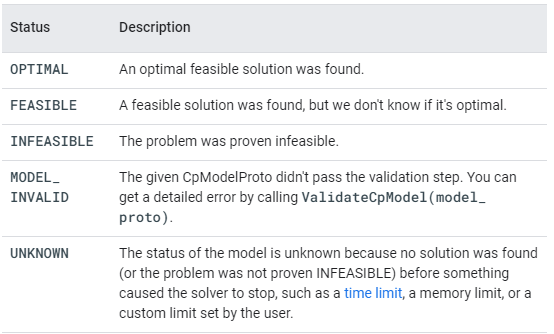

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from ortools.sat.python import cp_model


class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        for v in self.__variables:
            print('%s=%i' % (v, self.Value(v)), end=' ')
        print()

    def solution_count(self):
        return self.__solution_count


def SearchForAllSolutionsSampleSat():
    """Showcases calling the solver to search for all solutions."""
    # Creates the model.
    model = cp_model.CpModel()

    # Creates the variables.
    num_vals = 3
    x = model.NewIntVar(0, num_vals - 1, 'x')
    y = model.NewIntVar(0, num_vals - 1, 'y')
    z = model.NewIntVar(0, num_vals - 1, 'z')

    # Create the constraints.
    model.Add(x != y)

    # Create a solver and solve.
    solver = cp_model.CpSolver()
    solution_printer = VarArraySolutionPrinter([x, y, z])
    status = solver.SearchForAllSolutions(model, solution_printer)

    print('Status = %s' % solver.StatusName(status))
    print('Number of solutions found: %i' % solution_printer.solution_count())


SearchForAllSolutionsSampleSat()

## Heuristics

Optimization problems:

* continuous
>* Linear program (simplex method)
>* Non-linear program (gradient method, newton method, subgradient, Lagrangian relation)


* integer/discrete
>* Exact methods (Branch and cut, Bracnh and bound, Constraint programming)
>* High quality solutions found in a reasonable computation time (Heuristics)

Problems to solve with the Greedy algorithm:

* TSP problem
* Multi-knapsack problem

# Numpy (Draft)

```
>>> np.arange(6)
[0 1 2 3 4 5]
```

```
>>> np.arrange(6).reshape(2, 3)
[[0 1 2]
 [3 4 5]]
```

```




In [ ]:
import numpy as np

a = np.arange(6).reshape(2, 3)

print(a.ndim)

# Data Structure and Algorithms (Draft)

# Discrete mathematics

In [ ]:
coindef backtracking_subset(a, m):
    n = len(a)
    sub_indexes = [-1] * (m + 1)

    def Try(k):
        for i in range(sub_indexes[k - 1] + 1, n - m + k):
            sub_indexes[k] = i
            if k == m:
                print([a[index] for index in sub_indexes[1:]])
            else:
                Try(k + 1)
    Try(1)

def backtracking_permutation(a):
    n = len(a)
    per = [None] * n
    
    def Try(k):
        for i in a:
            if i not in per:
                per[k] = i
                if k == n - 1:
                    print(per)
                else:
                    Try(k + 1)
                per[k] = None
    Try(0)
    

def pstv_itg_root(n, k):    
    solution = [1] * k
    
    def Try(t):
        for i in range(1, n - sum(solution[:t])):
            solution[t] = i
            if t == k - 2:
                solution[-1] = n - sum(solution[:-1])
                print(solution)
            else:
                Try(t + 1)
    Try(0)
    

def knapsack_backtracking(w_max, weights, values):
    n = len(weights)
    total_weight = total_value = max_value = 0
    best_choice = [False] * n
    picked = [False] * n

    def Try(k):
        global total_weight, total_value, max_value
        if total_weight + 
        for value in (True, False):
            picked[k] = value
            if total_weight 
            if total_weight + weights[k] <= w_max:
                picked[k] = True
                total_weight += weights[k]
                total_value += values[k]
                Try(k + 1)
                picked[k] = False
                total_weight -= weights[k]
                total_value -= values[k]
            else:
                if total_value > max_value:
                    max_value = total_value
                    best_choice[:] = picked[:]
            print(picked, total_value, total_weight)
                
    Try(0)
    return best_choice, max_value

print(knapsack_backtracking(10, [6, 5, 4, 2, 2], [6, 3, 5, 4, 6]))





# Others' solutions

## [Human readable duration format](https://www.codewars.com/kata/52742f58faf5485cae000b9a/python)

```
1 minute and 2 seconds
1 hour, 1 minute and 2 seconds
```

In [ ]:
times = [("year", 365 * 24 * 60 * 60), 
         ("day", 24 * 60 * 60),
         ("hour", 60 * 60),
         ("minute", 60),
         ("second", 1)]

def format_duration(seconds):

    if not seconds:
        return "now"

    chunks = []
    for name, secs in times:
        qty = seconds // secs
        if qty:
            if qty > 1:
                name += "s"
            chunks.append(str(qty) + " " + name)

        seconds = seconds % secs

    return ', '.join(chunks[:-1]) + ' and ' + chunks[-1] if len(chunks) > 1 else chunks[0]

In [ ]:
def format_duration(seconds):
    if seconds == 0: return "now"
    units = ( (31536000, "year"  ), 
              (   86400, "day"   ),
              (    3600, "hour"  ),
              (      60, "minute"),
              (       1, "second") )
    ts, t = [], seconds
    for unit in units:
        u, t = divmod(t, unit[0])
        ts += ["{} {}{}".format(u, unit[1], "s" if u>1 else "")] if u != 0 else []
    return ", ".join([str(d)for d in ts[:-1]]) + (" and " if len(ts)>1 else "") + ts[-1]

# Exercises

In [ ]:
def key_sort(A):
    return A[1]


def natural_join(A, B):
    A.sort(key=key_sort)
    B.sort()
    c = []
    i = j = 0
    while i < len(A) and j < len(B):
        if A[i][1] == B[j][0]:
            c.append((A[i][0], A[i][1], B[j][1]))
            i += 1
            j += 1
        elif A[i][1] < B[j][0]:
            i += 1
        else:
            j += 1
        if i == len(A) or (j == len(B)):
            break
    return c

def mysum(A, r_start, r_stop, c_start, c_stop):
    if r_start == r_stop or c_start == c_stop:
        return 0
    else:
        return A[r_start][c_start] + mysum(A, r_start + 1, r_stop, c_start + 1, c_stop) + mysum(A, r_start + 1, r_stop, c_start, c_start + 1) + mysum(A, r_start, r_start + 1, c_start + 1, c_stop)

A = [[1, 2, 3],
     [4, 5, 6]]
print(mysum(A, 0, 2, 0, 3))

In [ ]:
s = ['a', 'b', 'c']
[[x for (pos,x) in zip(range(len(s)), s) if (2**pos) & b] for b in range(2**len(s))]

In [ ]:
# Xet cac day con cua S lap thanh mot cap so cong. In ra max cua cac tong cua tung day con do.
# VD: [-2, 1, -3, 4, -1, 2, 1, -5, 4] -> 8   (day so cong co tong lon nhat la: 4, 4)


def max_sum_addition(S, i):
    # find the maximum sum among sums of sequences of addtion started at S[i]

    def addition_step(start, stop):
        # return the next expected gap
        next_step = start
        while next_step < stop:
            yield next_step
            next_step += start
        yield start - 1

    # find the gap
    for j in range(i + 1, len(S)):
        S[j] -= S[i]
    
    #print(S)
    
    list_of_sums = [S[i]]

    for j in range(i + 1, len(S)):      # j is the currently considered arithmetical ratio
        gen_step = addition_step(S[j], S[-1] + 1)coin
        temp_sum = S[i]
        expected_step = next(gen_step)
        for k in range(j, len(S)):
            #print(S[i], expected_step, S[k])
            if S[k] == expected_step:
                temp_sum += S[i] + S[k]
                expected_step = next(gen_step)
        list_of_sums.append(temp_sum)

    #print(".", list_of_sums)
        
    for j in range(i + 1, len(S)):
        S[j] += S[i]

    return max(list_of_sums)

S = [1,2,3,4]
S.sort()
#print(S)
max_sum = max_sum_addition(S, 0)
for i in range(1, len(S)):coin
    candidate = max_sum_addition(S, i)
    if candidate > max_sum:
        max_sum = candidate
print(max_sum)


In [ ]:
def max_subarray(a):
    n = len(a)
    b = [float('-inf'), *a, float('inf')]
    L = [1] * (n + 2)
    T = [None] * (n + 2)
    for i in range(n, -1, -1):
        j_max = n + 1
        for j in range(i + 1, n + 2):
            #print(i, j, n + 1)
            if b[i] < b[j] and L[j] > L[j_max]:
                j_max = j
        L[i] = L[j_max] + 1
        T[i] = j_max
    return b, L, T

b, L, T = max_subarray([5, 2, 3, 4, 9, 10, 5, 6, 7, 8])coin
print(b)
print(L)
print(T)

In [ ]:
def matrix_mul_2(sizes):
    n = len(sizes) - 1                      # number of matrixs
    M = [[-1]*n for _ in range(n)]          # -1 denotes the value is not computed
    
    def recur_mul(i, j, sizes, M):
        if M[i][j] == -1:
            if i == j:
                M[i][j] = 0
            else:
                M[i][j] = min([recur_mul(i, k, sizes, M) + recur_mul(k + 1, j, sizes, M) + sizes[i]*sizes[k + 1]*sizes[j + 1] for k in range(i, j)])
        return M[i][j]

    return recur_mul(0, n - 1, sizes, M)
coin
print(matrix_mul_2([10, 30, 5, 60]))

In [ ]:
def Generating(n):
    arr = ['0'] * n
    while True:
        i = n - 1
        print(''.join(arr))
        while arr[i] == '1':
            arr[i] = '0'
            i -= coin
            if i == -1:
                return
        arr[i] = '1'


def Backtracking(n):
    a = [None] * n
    
    def Try(k):
        for bit in range(2):
            a[k] = bit
            if k == n - 1: print(a)
            else: Try(k + 1)
    Try(0)

"""
boolean solve(Node n) {
    put node n on the stack;
    while the stack is not empty {
        if the node at the top of the stack is a leaf {
            if it is a goal node, return true
            else pop it off the stack
        }
        else {
            if the node at the top of the stack has untried children
                push the next untried child onto the stack
            else pop the node off the stack

    }
    return false
}

nonrecur_algo(n):
    create a stack, put node 0 in the stack
    while stack is not empty:
        if stack[-1] is leaf:
            print result
            pop that stack[-1]
        else:coin
            if stack[-1] has untried children:
                push the the next child to the stack
            else:
                pop that stack[-1]
"""



# Introduction to Artificial Intelligence

## Chapter 1: Introduction

### Foundation of AI

||Mimic humans|Reach an ideal
|-|---|---|
Reasoning|Think like humans|Think rationally|
Behaviours|Act like humans|Acting rationally|

## Chapter 2: Intelligent agents

### Purpose of intelligent agents

***Agent***:

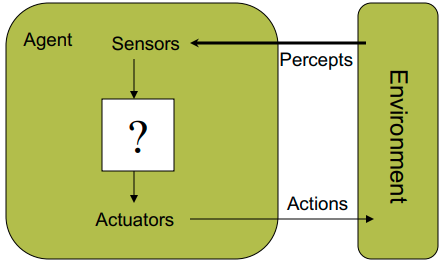

***Agent function***: maps from percept histories to actions:
$$f: P* \rightarrow A $$

Example:
* robotic agent (e.g., Aishimo)
>* Sensors: camera, infrared range finders
>* Actuators: various motors
* software agent
>* Sensors: keypad, file uploader, network packet receiver…
>* Actuators: screen, file writer, network packet sender…

The agent’s ***percept sequence*** is the complete history of percepts received by the agent. In general, an agent acts based on its percept sequence, but NOT on anything it did NOT perceive.

One (basic) way to implement the agent function is
to map any given percept sequence to an action:


```
Function TABLE-DRIVEN-AGENT(input_percept)
    static: current_percept_sequence: initially empty
            table: a table of actions, indexed by all possible percept sequences, initially fully specified
    Append input_percept to the end of current_percept_sequence
    action = LOOKUP(current_percept_sequence, table)
    Return action
    
# Drawback: huge table!
```

***Rational agent***: does the right thing - the one that will cause the agent to be most successful. Depends on:
>* ***Performance measure***: embodies the criterion for success of an agent’s behavior.
>* The agent’s prior knowledge of the environment
>* The actions that the agent can perform
>* The agent’s percept sequence to date
>
> Rationality $\ne$ perfection
>
> For each possible percept sequence, a rational
agent should select an action that:
>>* is expected to maximize its performance measure…
>>* given the evidence provided by the percept sequence…
>>* and given the built-in knowledge the agent has

### PEAS

4 factors should be considered when designing an automated agent:
>* ***Performance measure***
>* ***Environment***
>* ***Actuators***
>* ***Sensors***

### Environment types

>* ***Known*** (vs. unknown): relative to the knowledge of the agent regarding its environment
>* ***Fully observable*** (vs. partially observable): sensors access to the complete state of the environment at each point in time.
>* ***Deterministic*** (vs. stochastic): The next state of the environment is completely determined by the current state and the action executed by the agent.
>* ***Single agent*** (vs. multiagent): An agent operating by itself in an environment. For multiagents: competitive vs. cooperative
>* ***Static*** (vs. dynamic): The environment is unchanged while an agent is deliberating.
>* ***Discrete*** (vs. continuous): A limited number of distinct, clearly defined percepts and actions.
>* ***Episodic*** (vs. sequential): The agent's experience is divided into atomic "episodes" (percept + action). The next episode does NOT depend on the actions taken in previous episodes.

### Agent types

An ***autonomous*** agent can learn from its experience, to compensate for partial or incorrect prior knowledge of its environment.

Four basic agent types:
>* ***Simple reflex agents***
>> select actions on the basis of the **current percept**, **ignoring** the rest of the **percept history**.
>> 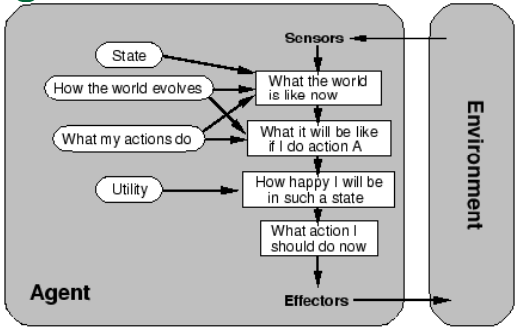
>* ***Model-based reflex agents***
>> maintain internal states that depends on the percept history and thereby reflects at least some of the unobserved aspects.
>> 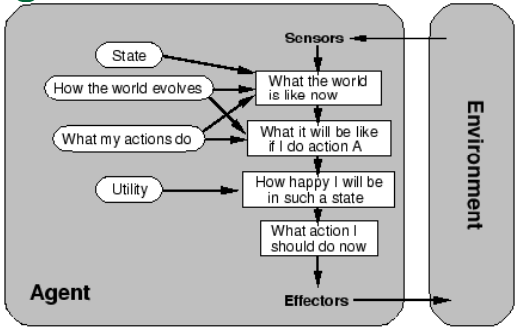
of the current state.
>* ***Goal-based agents***
>> take actions in the pursuit of a goal(or multiple goals).
>> x-special/nautilus-clipboard
copy
file:///home/ubuntu/Pictures/Screenshot%20from%202020-11-25%2011-06-36.png
>* ***Utility-based agents***
>> take actions making them the happiest in the long run.
>> x-special/nautilus-clipboard
copy
file:///home/ubuntu/Pictures/Screenshot%20from%202020-11-25%2011-04-53.png

***Leanring agents***:
> x-special/nautilus-clipboard
copy
file:///home/ubuntu/Pictures/Screenshot%20from%202020-11-25%2011-07-57.png
> Example: For a taxi driver agent, please identify what could be:
>>* The performance standard: safety, where to go, how fast
>>* The performance element: knowledge and procedures to selecting actions
>>* The critic: eg after making a U-turn where forbidden, it is fined by police
>>* The learning element: from experience, formulate a rule that you cannot make a U-turn where forbidden.
>>* The problem generator: 

## Chapter 3: Problem solving

## Chapter 4: Knownledge and Inference

## Chapter 5: Uncertain knowledge and reasoning

## Chapter 6: Advanced topics

### Machine learning

### Computer vision

# Summary

## Generating 

## Backtracking

In [ ]:
# backtracking: tsp, subset, permutation, positive integer root, knapsack, Bin backing problem

## Greedy

### TSP problem

In [ ]:
import numpy as np

def my_input():
    n, graph = 10, [[0, 68, 35, 1, 70, 25, 79, 59, 63, 65],
                         [6, 0, 82, 28, 62, 92, 96, 43, 28, 37],
                         [92, 5, 0, 54, 93, 83, 22, 17, 19, 96],
                         [48, 27, 72, 0, 70, 13, 68, 100, 36, 95],
                         [4, 12, 23, 34, 0, 65, 42, 12, 54, 69],
                         [48, 45, 63, 58, 38, 0, 24, 42, 30, 79],
                         [17, 36, 91, 43, 89, 7, 0, 43, 65, 49],
                         [47, 6, 91, 30, 71, 51, 7, 0, 94, 49],
                         [30, 24, 85, 55, 57, 41, 67, 77, 0, 9],
                         [45, 40, 27, 24, 38, 39, 19, 83, 30, 0]]
    for i in range(n):
        graph[i][i] = 100000000
    return n, graph



n, graph = my_input()

def Greedy_TSP(n, graph):
    path, selected = [None] * n, [False] * n
    path[0], selected[0] = 0, True
    i = 1
    s = 0
    while i < n:
        closest_city, min_distance = n, float('inf')
        for j in range(n):
            if not selected[j] and graph[path[i - 1]][j] < min_distance:
                closest_city, min_distance = j, graph[path[i - 1]][j]
        path[i] = closest_city
        selected[closest_city] = True
        i += 1
    return path

print(Greedy_TSP(n, graph))
        


### Multi-knapsack problem

In [ ]:
def Greedy_multi_knapsack(capacity, weights, values):
    pass

## Branch and bound

In [ ]:
# branch and bound: tsp, knapsack, Bin backing problem
# link Mrs Phuong: https://drive.google.com/file/d/1-ghy1y4Li9Pd-yYIZbGkFgvCv5boOB7c/view?usp=sharing


## Dynamic programming

### Fibonacci

In [ ]:
def DP_fibonacci(n):
    cur, nex = 0, 1
    for i in range(n):
        cur, nex = nex, cur + nex
    return cur

for i in range(4):
    print(DP_fibonacci(i))

## Making change problem


We have two choices :
1. Don’t use a coin from $d[i]$, then $t[i, j] = t[i − 1, j]$

2. Use at least one coin from $d[i]$, then $t[i, j] = t[i, j − d[i]] + 1$

So, we have $t[i, j] = min(t[i − 1, j],t[i, j − di] + 1)$

In [ ]:
# dynamic: fib, max sub arr, matrix mul, Longest common subsequence, The All-Pairs Shortest-Path Problem, 
# link Mr Michel: https://drive.google.com/file/d/1ETfNzGRAnBm1H9kRNm-QJbANflWZ0TjH/view?usp=sharing

def DP_making_change(amount, denominations):
    coins = [j for j in range(amount + 1)]              # assume that the initial value of denominations is 1
    for value in denominations[1:]:
        for j in range(amount + 1):
            if j >= value:
                coins[j] = min(coins[j], coins[j - value] + 1)
    return coins[-1]

print(DP_making_change(5, [2, 1]))


### Knapsack 0-1 problem



In [ ]:
def DP_knapsack_01(capacity, weights, values):
    cur_table = [0 if cap < weights[0] else values[0] for cap in range(capacity + 1)]
    next_table = [None] * (capacity + 1)
    for item in range(1, len(weights)):
        for cap in range(capacity + 1):
            next_table[cap] = cur_table[cap] if cap < weights[item] else max(cur_table[cap], cur_table[cap - weights[item]] + values[item])
        cur_table, next_table = next_table, cur_table
    return cur_table[-1]

print(DP_knapsack_01(10, [6, 5, 4, 2, 2], [6, 3, 5, 4, 6]))

### Multi-knapsack problem

In [ ]:
def DP_multi_knapsack(capacity, weights, values):
    table = [0 if cap < weights[0] else values[0] for cap in range(capacity + 1)]
    for item in range(1, len(weights)):
        for cap in range(capacity + 1):
            if cap >= weights[item]:
                table[cap] = max(table[cap], table[cap - weights[item]] + values[item])
    return table[-1]

print(DP_multi_knapsack(10, [6, 5, 4, 2, 2], [6, 3, 5, 4, 6]))